In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt


import os
os.chdir('/content/drive/MyDrive/dacon/daconcup/')
import utils

# 데이터 불러오기

In [9]:
train = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/train.csv', encoding='cp949', parse_dates=['DateTime'], index_col=['DateTime'])
info_user = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/info_user.csv', encoding='cp949')
info_login = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/info_login.csv', encoding='cp949')
info_cpt = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/info_competition.csv', encoding='cp949')
info_sub = pd.read_csv('/content/drive/MyDrive/dacon/daconcup/Data/raw/info_submission.csv', encoding='cp949')

# 1. 시계열 데이터 분포 보기

- 1h, 1d, 7일 이동평균에 따른 그래프 그리는 방법 숙지하기

In [10]:
idx = pd.date_range('2018-01-01', '2020-12-31', freq='1h')
train = train.reindex(idx, fill_value=0).rename_axis('DateTime')

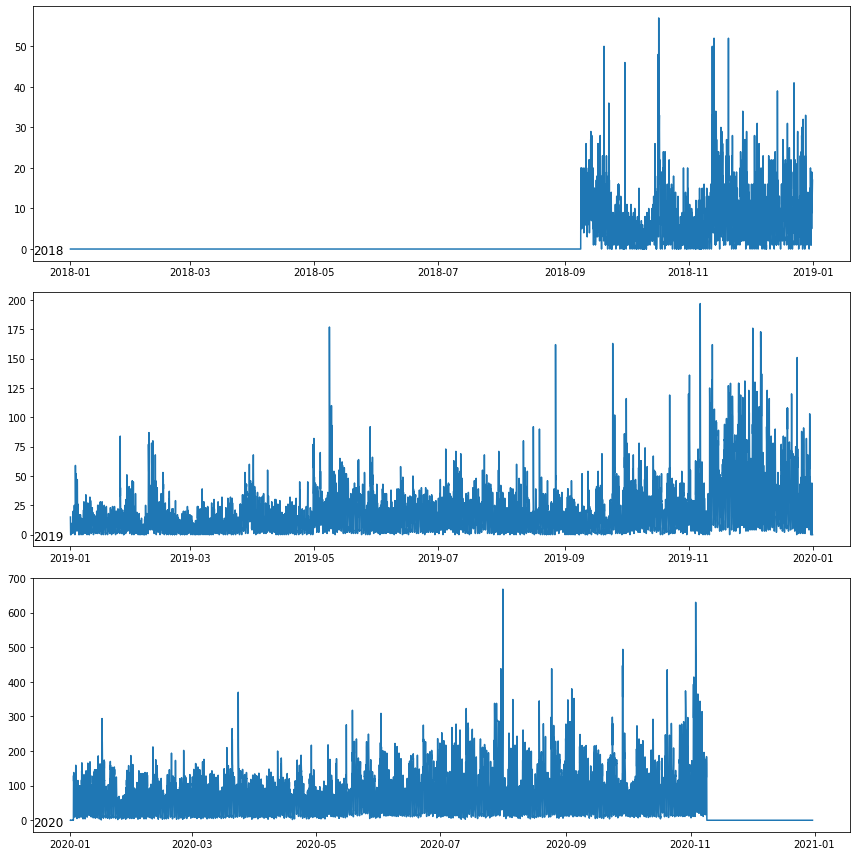

In [11]:
years = ['2018', '2019', '2020']
plt.figure(figsize=(12,12))
for i in range(len(years)):
	# prepare subplot
	ax = plt.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = train[str(year)]
	# plot the active power for the year
	plt.plot(result['사용자'])
	# add a title to the subplot
	plt.title(str(year), y=0, loc='left')
plt.tight_layout();

In [12]:
idx = pd.date_range('2018-01-01', '2020-12-31')
train_day = train.resample('1D').sum()

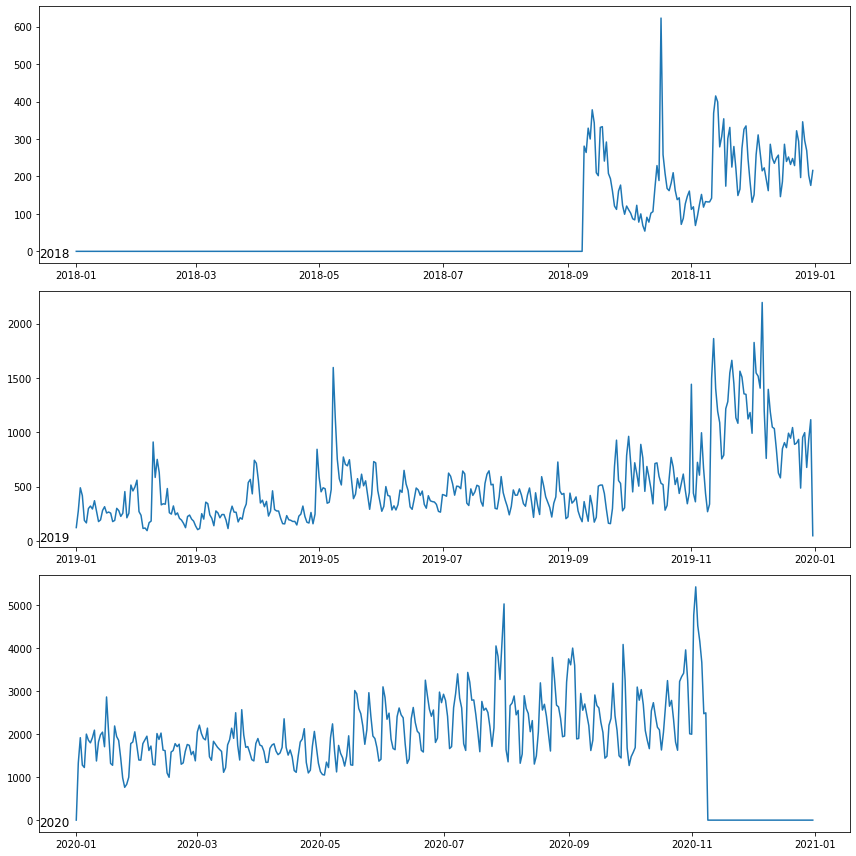

In [13]:
years = ['2018', '2019', '2020']
plt.figure(figsize=(12,12))
for i in range(len(years)):
	# prepare subplot
	ax = plt.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = train_day[str(year)]
	# plot the active power for the year
	plt.plot(result['사용자'])
	# add a title to the subplot
	plt.title(str(year), y=0, loc='left')
plt.tight_layout();

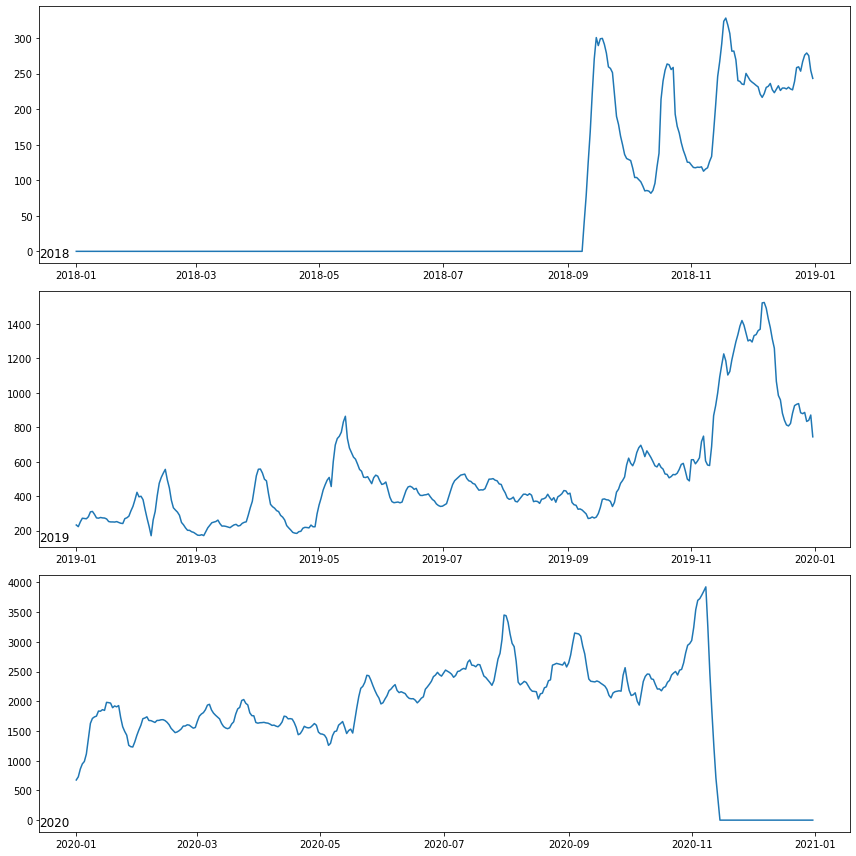

In [14]:
train_day_mean7 = train_day.rolling(window=7, min_periods=1).mean()

years = ['2018', '2019', '2020']
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
for i in range(len(years)):

	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = train_day_mean7[str(year)]
	# plot the active power for the year
	axes[i].plot(result['사용자'])
	# add a title to the subplot
	axes[i].set_title(str(year), y=0, loc='left')
plt.tight_layout();

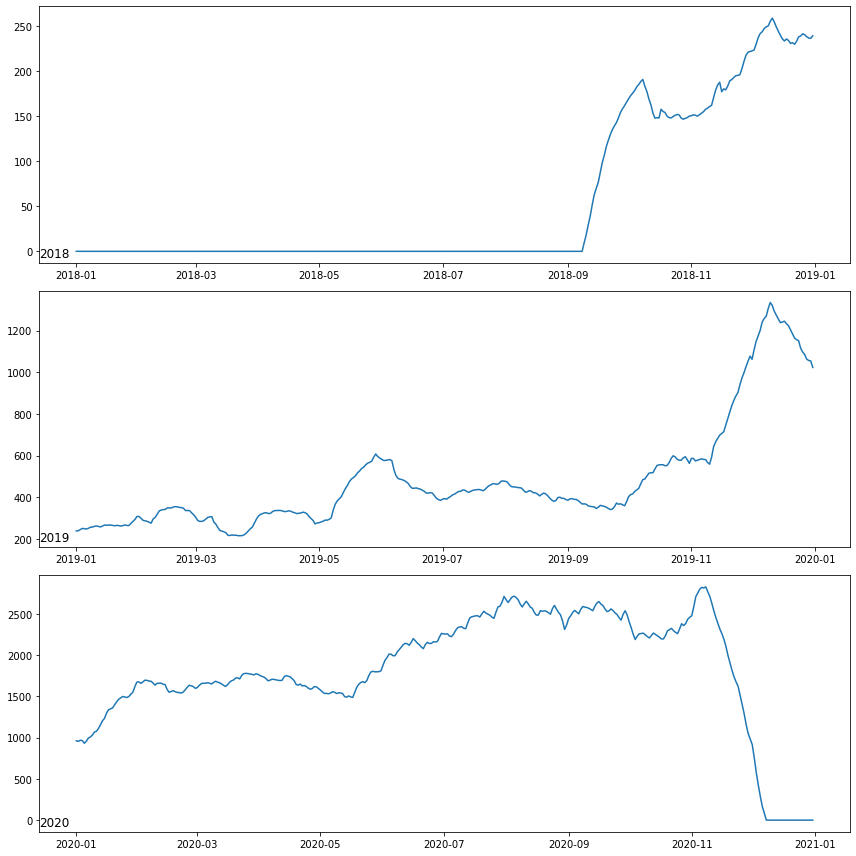

In [16]:
train_day_mean30 = train_day.rolling(window=30, min_periods=1).mean()

years = ['2018', '2019', '2020']
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
for i in range(len(years)):

	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = train_day_mean30[str(year)]
	# plot the active power for the year
	axes[i].plot(result['사용자'])
	# add a title to the subplot
	axes[i].set_title(str(year), y=0, loc='left')
plt.tight_layout();

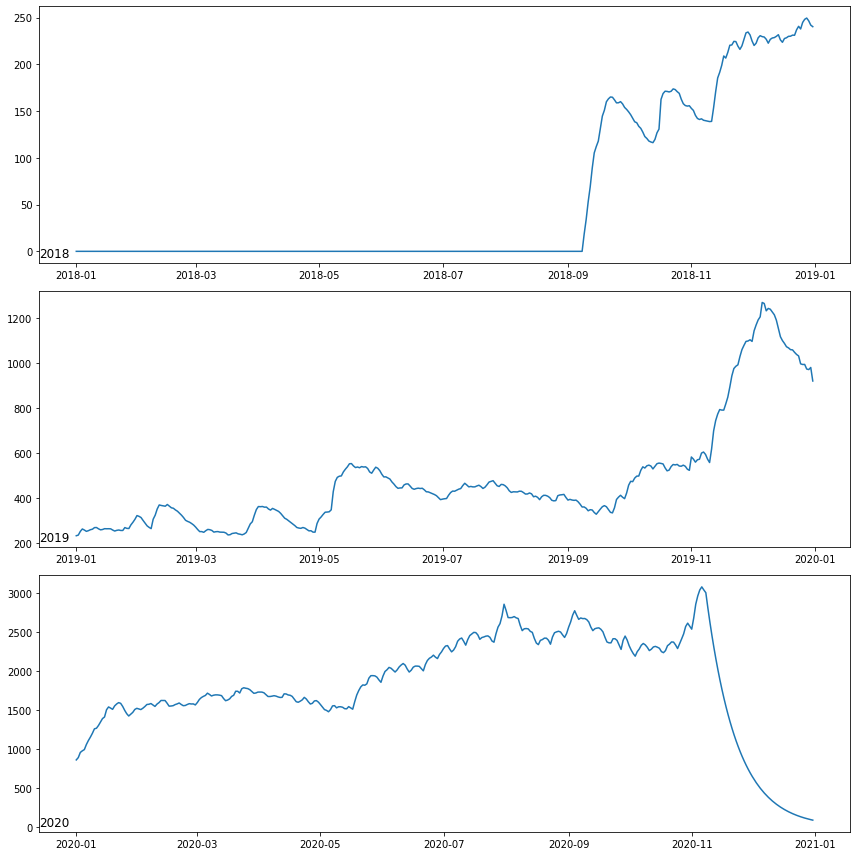

In [25]:
# 지수평활
ewma = train_day.ewm(span=30).mean()
years = ['2018', '2019', '2020']
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
for i in range(len(years)):

	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = ewma[str(year)]
	# plot the active power for the year
	axes[i].plot(result['사용자'])
	# add a title to the subplot
	axes[i].set_title(str(year), y=0, loc='left')
plt.tight_layout();

# 2. 자기 상관성 확인

- 자기 상관성이 높은 시기의 기간만을 가지고 와서 학습

- 100일만큼 뽑아서 학습시켜보고 전체 데이터로 학습시키는 경우와 validation 결과 보기

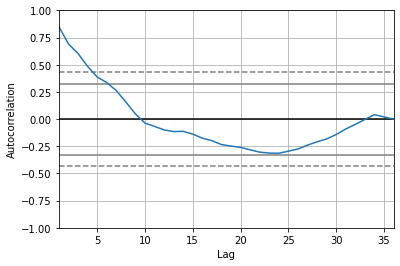

In [ ]:
pd.plotting.autocorrelation_plot(train['사용자'].resample('m').median())

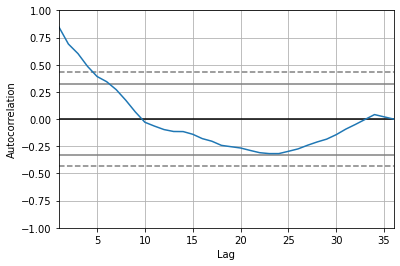

In [ ]:
pd.plotting.autocorrelation_plot(train['세션'].resample('m').median())

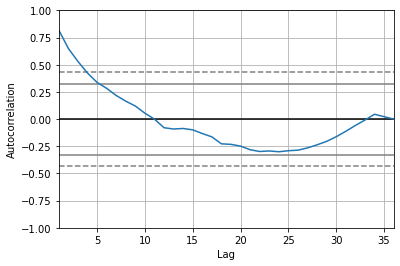

In [ ]:
pd.plotting.autocorrelation_plot(train['신규방문자'].resample('m').median())

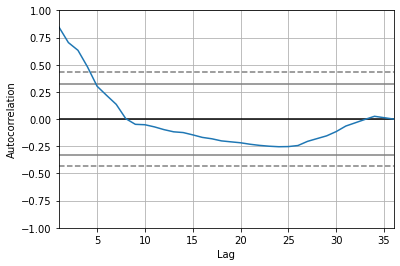

In [ ]:
pd.plotting.autocorrelation_plot(train['페이지뷰'].resample('m').median())